In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time

plt.style.use(style="seaborn")
%matplotlib inline

In [2]:
#print(data[4])

In [3]:

#bitcoin
url = 'https://api.binance.com/api/v3/klines?symbol=BTCUSDT&interval=1w'
#url = 'https://api.binance.com/api/v1/klines?symbol=BTCUSDT&interval=15m'
#url = 'https://api.binance.com/api/v1/klines?symbol=BTCUSDT&interval=3d'
#ethereum
#url = 'https://api.binance.com/api/v1/klines?symbol=ETHUSDT&interval=3d'
#url = 'https://api.binance.com/api/v1/klines?symbol=ETHUSDT&interval=15m'
#url = 'https://api.binance.com/api/v1/klines?symbol=ETHUSDT&interval=3d'


import requests
from pandas.io.json import json_normalize
import pandas as pd

#url = "https://api.exchangerate-api.com/v4/latest/USD"
df = pd.read_json(url)
df.columns = ["openTime","Open","High","Low","Close","Volume","CloseTime","QuoteAssetVolume","NumberofTrades","TakerbuyBaseAssetVolume","TakerbuyQuoteAssetVolume","Ignore"]

print(df)
#df_close=df[4]
#print(df_close)




          openTime      Open      High       Low     Close        Volume  \
0    1502668800000   4261.48   4485.39   3850.00   4086.29  2.843431e+03   
1    1503273600000   4069.13   4453.91   3400.00   4310.01  4.599397e+03   
2    1503878400000   4310.01   4939.19   4124.54   4509.08  4.753843e+03   
3    1504483200000   4505.00   4788.59   3603.00   4130.37  6.382788e+03   
4    1505088000000   4153.62   4394.59   2817.00   3699.99  8.106705e+03   
..             ...       ...       ...       ...       ...           ...   
287  1676246400000  21782.37  25250.00  21351.07  24271.76  2.497565e+06   
288  1676851200000  24272.51  25250.00  22722.00  23554.85  2.237984e+06   
289  1677456000000  23554.85  24000.00  21971.13  22430.24  1.698503e+06   
290  1678060800000  22430.24  22602.19  19549.09  21997.11  2.718624e+06   
291  1678665600000  21998.05  27756.84  21813.88  27132.37  3.444646e+06   

         CloseTime  QuoteAssetVolume  NumberofTrades  TakerbuyBaseAssetVolume  \
0    1

In [4]:
#df = pd.read_csv("convertcsvBT5min.csv") #5minutes

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   openTime                  292 non-null    int64  
 1   Open                      292 non-null    float64
 2   High                      292 non-null    float64
 3   Low                       292 non-null    float64
 4   Close                     292 non-null    float64
 5   Volume                    292 non-null    float64
 6   CloseTime                 292 non-null    int64  
 7   QuoteAssetVolume          292 non-null    float64
 8   NumberofTrades            292 non-null    int64  
 9   TakerbuyBaseAssetVolume   292 non-null    float64
 10  TakerbuyQuoteAssetVolume  292 non-null    float64
 11  Ignore                    292 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 27.5 KB


In [6]:
df.describe()

,openTime,Open,High,Low,Close,Volume,CloseTime,QuoteAssetVolume,NumberofTrades,TakerbuyBaseAssetVolume,TakerbuyQuoteAssetVolume,Ignore
count,2.920000e+02,292.000000,292.000000,292.000000,292.000000,2.920000e+02,2.920000e+02,2.920000e+02,2.920000e+02,2.920000e+02,2.920000e+02,292.0
mean,1.590667e+12,19457.019384,21005.010651,17838.908836,19534.814212,5.406626e+05,1.591272e+12,1.164599e+10,1.033404e+07,2.691357e+05,5.773204e+09,0.0
std,5.106771e+10,16466.515942,17639.714881,15025.986230,16448.494182,5.635058e+05,5.106771e+10,1.386326e+10,1.399965e+07,2.801942e+05,6.881983e+09,0.0
min,1.502669e+12,3229.220000,3557.750000,2817.000000,3228.670000,2.843431e+03,1.503274e+12,1.202158e+07,1.313400e+04,1.371034e+03,6.237542e+06,0.0
25%,1.546668e+12,7380.732500,7834.172500,6748.245000,7390.227500,2.454796e+05,1.547273e+12,1.965850e+09,1.985379e+06,1.248790e+05,9.990490e+08,0.0
50%,1.590667e+12,10913.115000,11805.455000,9890.120000,10924.755000,3.540327e+05,1.591272e+12,4.236434e+09,5.059948e+06,1.770692e+05,2.086341e+09,0.0
75%,1.634666e+12,30012.882500,31923.980000,27029.890000,30012.892500,5.400212e+05,1.635271e+12,1.873025e+10,1.164917e+07,2.667895e+05,9.214699e+09,0.0
max,1.678666e+12,65519.110000,69000.000000,62278.000000,65519.100000,3.444646e+06,1.679270e+12,8.614750e+10,7.743109e+07,1.734732e+06,4.339141e+10,0.0


In [7]:
df.head()

,openTime,Open,High,Low,Close,Volume,CloseTime,QuoteAssetVolume,NumberofTrades,TakerbuyBaseAssetVolume,TakerbuyQuoteAssetVolume,Ignore
0,1502668800000,4261.48,4485.39,3850.00,4086.29,2843.431426,1503273599999,1.202158e+07,13134,2240.249240,9.482743e+06,0
1,1503273600000,4069.13,4453.91,3400.00,4310.01,4599.396629,1503878399999,1.897898e+07,37826,1755.530265,7.173180e+06,0
2,1503878400000,4310.01,4939.19,4124.54,4509.08,4753.843376,1504483199999,2.158168e+07,35717,1371.034428,6.237542e+06,0
3,1504483200000,4505.00,4788.59,3603.00,4130.37,6382.787745,1505087999999,2.730782e+07,42372,2821.422739,1.212098e+07,0
4,1505088000000,4153.62,4394.59,2817.00,3699.99,8106.705127,1505692799999,3.002680e+07,50423,3763.128452,1.395615e+07,0


In [8]:
#df = df[["Close"]]
#df = df["Close"]

In [9]:
df.Close

0       4086.29
1       4310.01
2       4509.08
3       4130.37
4       3699.99
         ...   
287    24271.76
288    23554.85
289    22430.24
290    21997.11
291    27132.37
Name: Close, Length: 292, dtype: float64

In [10]:
df.describe()

,openTime,Open,High,Low,Close,Volume,CloseTime,QuoteAssetVolume,NumberofTrades,TakerbuyBaseAssetVolume,TakerbuyQuoteAssetVolume,Ignore
count,2.920000e+02,292.000000,292.000000,292.000000,292.000000,2.920000e+02,2.920000e+02,2.920000e+02,2.920000e+02,2.920000e+02,2.920000e+02,292.0
mean,1.590667e+12,19457.019384,21005.010651,17838.908836,19534.814212,5.406626e+05,1.591272e+12,1.164599e+10,1.033404e+07,2.691357e+05,5.773204e+09,0.0
std,5.106771e+10,16466.515942,17639.714881,15025.986230,16448.494182,5.635058e+05,5.106771e+10,1.386326e+10,1.399965e+07,2.801942e+05,6.881983e+09,0.0
min,1.502669e+12,3229.220000,3557.750000,2817.000000,3228.670000,2.843431e+03,1.503274e+12,1.202158e+07,1.313400e+04,1.371034e+03,6.237542e+06,0.0
25%,1.546668e+12,7380.732500,7834.172500,6748.245000,7390.227500,2.454796e+05,1.547273e+12,1.965850e+09,1.985379e+06,1.248790e+05,9.990490e+08,0.0
50%,1.590667e+12,10913.115000,11805.455000,9890.120000,10924.755000,3.540327e+05,1.591272e+12,4.236434e+09,5.059948e+06,1.770692e+05,2.086341e+09,0.0
75%,1.634666e+12,30012.882500,31923.980000,27029.890000,30012.892500,5.400212e+05,1.635271e+12,1.873025e+10,1.164917e+07,2.667895e+05,9.214699e+09,0.0
max,1.678666e+12,65519.110000,69000.000000,62278.000000,65519.100000,3.444646e+06,1.679270e+12,8.614750e+10,7.743109e+07,1.734732e+06,4.339141e+10,0.0


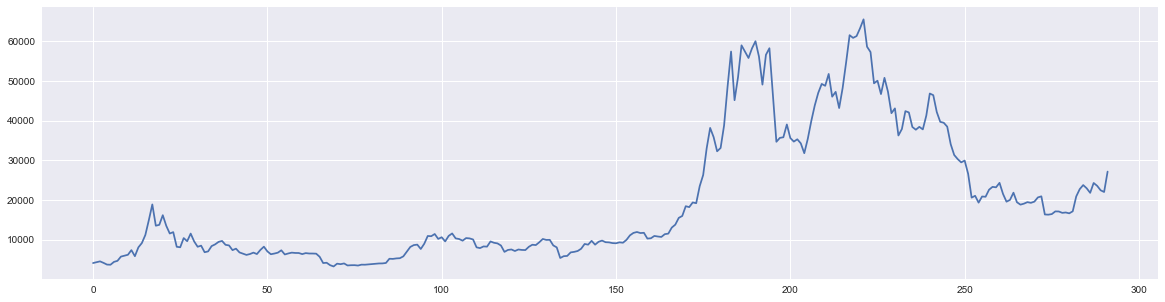

In [11]:
plt.figure(1, figsize=(20,5)) 
_ = plt.plot(df.Close)

Calculate the percetange change

https://en.wikipedia.org/wiki/Stationary_process




In [12]:
df["returns"] = df['Close'].pct_change()

In [13]:
df

,openTime,Open,High,Low,Close,Volume,CloseTime,QuoteAssetVolume,NumberofTrades,TakerbuyBaseAssetVolume,TakerbuyQuoteAssetVolume,Ignore,returns
0,1502668800000,4261.48,4485.39,3850.00,4086.29,2.843431e+03,1503273599999,1.202158e+07,13134,2.240249e+03,9.482743e+06,0,NaN
1,1503273600000,4069.13,4453.91,3400.00,4310.01,4.599397e+03,1503878399999,1.897898e+07,37826,1.755530e+03,7.173180e+06,0,0.054749
2,1503878400000,4310.01,4939.19,4124.54,4509.08,4.753843e+03,1504483199999,2.158168e+07,35717,1.371034e+03,6.237542e+06,0,0.046188
3,1504483200000,4505.00,4788.59,3603.00,4130.37,6.382788e+03,1505087999999,2.730782e+07,42372,2.821423e+03,1.212098e+07,0,-0.083988
4,1505088000000,4153.62,4394.59,2817.00,3699.99,8.106705e+03,1505692799999,3.002680e+07,50423,3.763128e+03,1.395615e+07,0,-0.104199
...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,1676246400000,21782.37,25250.00,21351.07,24271.76,2.497565e+06,1676851199999,5.873952e+10,58393471,1.250658e+06,2.941542e+10,0,0.114225
288,1676851200000,24272.51,25250.00,22722.00,23554.85,2.237984e+06,1677455999999,5.375002e+10,73475940,1.113474e+06,2.674707e+10,0,-0.029537
289,1677456000000,23554.85,24000.00,21971.13,22430.24,1.698503e+06,1678060799999,3.922468e+10,55369117,8.443098e+05,1.950010e+10,0,-0.047744
290,1678060800000,22430.24,22602.19,19549.09,21997.11,2.718624e+06,1678665599999,5.710990e+10,64620831,1.355464e+06,2.847683e+10,0,-0.019310


In [14]:
52394.40/52252.27 - 1

0.0027200732140442163

Calculate the log returns

Why use log returns:
https://quantivity.wordpress.com/2011/02/21/why-log-returns


In [15]:
df["log_returns"] = np.log(1+df["returns"])

In [16]:
df.head(5)

,openTime,Open,High,Low,Close,Volume,CloseTime,QuoteAssetVolume,NumberofTrades,TakerbuyBaseAssetVolume,TakerbuyQuoteAssetVolume,Ignore,returns,log_returns
0,1502668800000,4261.48,4485.39,3850.00,4086.29,2843.431426,1503273599999,1.202158e+07,13134,2240.249240,9.482743e+06,0,NaN,NaN
1,1503273600000,4069.13,4453.91,3400.00,4310.01,4599.396629,1503878399999,1.897898e+07,37826,1755.530265,7.173180e+06,0,0.054749,0.053303
2,1503878400000,4310.01,4939.19,4124.54,4509.08,4753.843376,1504483199999,2.158168e+07,35717,1371.034428,6.237542e+06,0,0.046188,0.045153
3,1504483200000,4505.00,4788.59,3603.00,4130.37,6382.787745,1505087999999,2.730782e+07,42372,2821.422739,1.212098e+07,0,-0.083988,-0.087726
4,1505088000000,4153.62,4394.59,2817.00,3699.99,8106.705127,1505692799999,3.002680e+07,50423,3763.128452,1.395615e+07,0,-0.104199,-0.110037


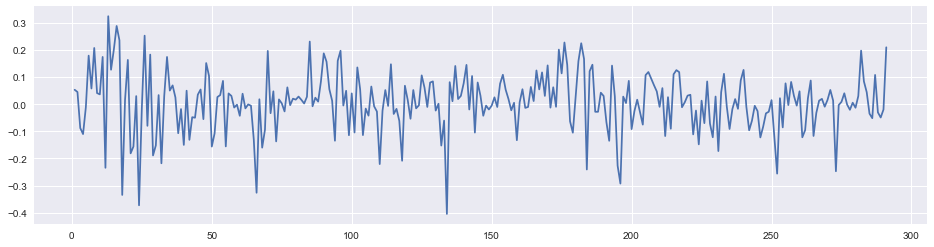

In [17]:
plt.figure(1, figsize=(16,4))
plt.plot(df.log_returns)

In [18]:
#quitamos los num's ceros y na p simplif
df.dropna(inplace=True)
X = df[["Close","log_returns"]].values

In [19]:
#matrix con 2 valores
X

array([[ 4.31001000e+03,  5.33027564e-02],
       [ 4.50908000e+03,  4.51529173e-02],
       [ 4.13037000e+03, -8.77261502e-02],
       [ 3.69999000e+03, -1.10036874e-01],
       [ 3.66002000e+03, -1.08615051e-02],
       [ 4.37848000e+03,  1.79233020e-01],
       [ 4.64000000e+03,  5.80127340e-02],
       [ 5.70999000e+03,  2.07502906e-01],
       [ 5.95002000e+03,  4.11773085e-02],
       [ 6.16998000e+03,  3.63010155e-02],
       [ 7.34501000e+03,  1.74325575e-01],
       [ 5.81103000e+03, -2.34263335e-01],
       [ 8.03800000e+03,  3.24422460e-01],
       [ 9.12802000e+03,  1.27168508e-01],
       [ 1.11654100e+04,  2.01471803e-01],
       [ 1.48999800e+04,  2.88539264e-01],
       [ 1.88600200e+04,  2.35684467e-01],
       [ 1.35000000e+04, -3.34354652e-01],
       [ 1.37163600e+04,  1.58995955e-02],
       [ 1.61500300e+04,  1.63332626e-01],
       [ 1.34749900e+04, -1.81086533e-01],
       [ 1.15300000e+04, -1.55883040e-01],
       [ 1.18799500e+04,  2.98997709e-02],
       [ 8.

In [20]:
#para normalizar proximam
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler = MinMaxScaler(feature_range=(0,1)).fit(X)

In [22]:
X_scaled = scaler.transform(X)

In [23]:
X_scaled[:5]

array([[0.01735965, 0.62799807],
       [0.02055549, 0.61681572],
       [0.01447574, 0.43449304],
       [0.00756649, 0.40388061],
       [0.00692482, 0.53995862]])

In [24]:
y = [x[0] for x in X_scaled]

In [25]:
#serie de precios - precio del dia siguiente 
y[:5]

[0.017359648986208634,
 0.020555485007889646,
 0.014475738889585449,
 0.007566491353487199,
 0.006924819751605506]

In [26]:
#dividir nuestros datos en Train y en Test

In [27]:
split = int(len(X_scaled)*0.8)

In [28]:
print(split)  # es el .80 qty para Train

232


In [29]:
X_train = X_scaled[:split]

In [30]:
X_test = X_scaled[split:len(X_scaled)]


In [31]:
len(X_test)  #qty for test

59

In [32]:
y_train = y[:split]

In [33]:
y_test = y[split:len(y)]

In [34]:
#solo para asegurarnos q son iguales, si son difs es un error
assert len(X_train) == len(y_train)
assert len(X_test) == len(y_test)

In [35]:
X_train

array([[0.01735965, 0.62799807],
       [0.02055549, 0.61681572],
       [0.01447574, 0.43449304],
       [0.00756649, 0.40388061],
       [0.00692482, 0.53995862],
       [0.01845885, 0.80078633],
       [0.02265725, 0.6344606 ],
       [0.03983469, 0.83957529],
       [0.04368809, 0.6113608 ],
       [0.04721929, 0.60467007],
       [0.06608302, 0.79405285],
       [0.04145677, 0.23343013],
       [0.07720817, 1.        ],
       [0.09470716, 0.72934888],
       [0.12741508, 0.83130004],
       [0.18736923, 0.95076485],
       [0.25094304, 0.87824306],
       [0.16489419, 0.09609536],
       [0.1683676 , 0.57667739],
       [0.20743732, 0.77896948],
       [0.16449268, 0.30639375],
       [0.13326814, 0.34097533],
       [0.13888618, 0.59588695],
       [0.07956503, 0.04365739],
       [0.07762364, 0.53443777],
       [0.1148613 , 0.90174975],
       [0.10212371, 0.4457933 ],
       [0.13302734, 0.80585845],
       [0.1012178 , 0.29576722],
       [0.07964819, 0.34643141],
       [0.

In [36]:
y_train

[0.017359648986208634,
 0.020555485007889646,
 0.014475738889585449,
 0.007566491353487199,
 0.006924819751605506,
 0.018458854755056264,
 0.02265725248645739,
 0.03983469049740064,
 0.04368809141307903,
 0.047219291952230846,
 0.06608302431047594,
 0.04145676952302303,
 0.07720816825313292,
 0.09470716448738595,
 0.12741507804649926,
 0.18736923151758622,
 0.2509430421334385,
 0.16489419000639421,
 0.16836759675603458,
 0.20743732223392902,
 0.1644926837075936,
 0.1332681440792751,
 0.1388861820347042,
 0.07956503109707222,
 0.07762364138439884,
 0.11486130373477915,
 0.10212371306475168,
 0.13302733662297722,
 0.10121779541415912,
 0.07964818993864706,
 0.08414583106907433,
 0.057542386527111786,
 0.060833261224878366,
 0.08229723249622775,
 0.08923280831421457,
 0.09937850806295606,
 0.10323158790202602,
 0.08751007177185963,
 0.08505817025183482,
 0.0659863802513484,
 0.07201090119300829,
 0.056771481590350226,
 0.05170842455253559,
 0.046689355010071376,
 0.050218629089572836,
 0.

Labeling using LSTM

memoria corto plazo,  el RNN (no memoriza)
output  t+1

In [37]:
n = 3
Xtrain = []
ytrain = []
Xtest = []
ytest = []

for i in range(n, len(X_train)):
    Xtrain.append(X_train[i - n : i, : X_train.shape[1]])
    ytrain.append(y_train[i])  #predict next record
for i in range(n, len(X_test)):
    Xtest.append(X_test[i-n:i, : X_test.shape[1]])
    ytest.append(y_test[i])  #predict next record

In [38]:
df.head(5)

,openTime,Open,High,Low,Close,Volume,CloseTime,QuoteAssetVolume,NumberofTrades,TakerbuyBaseAssetVolume,TakerbuyQuoteAssetVolume,Ignore,returns,log_returns
1,1503273600000,4069.13,4453.91,3400.00,4310.01,4599.396629,1503878399999,1.897898e+07,37826,1755.530265,7.173180e+06,0,0.054749,0.053303
2,1503878400000,4310.01,4939.19,4124.54,4509.08,4753.843376,1504483199999,2.158168e+07,35717,1371.034428,6.237542e+06,0,0.046188,0.045153
3,1504483200000,4505.00,4788.59,3603.00,4130.37,6382.787745,1505087999999,2.730782e+07,42372,2821.422739,1.212098e+07,0,-0.083988,-0.087726
4,1505088000000,4153.62,4394.59,2817.00,3699.99,8106.705127,1505692799999,3.002680e+07,50423,3763.128452,1.395615e+07,0,-0.104199,-0.110037
5,1505692800000,3690.00,4123.20,3505.55,3660.02,5908.323350,1506297599999,2.250124e+07,56785,2821.438887,1.071186e+07,0,-0.010803,-0.010862


In [39]:
Xtrain[0]

array([[0.01735965, 0.62799807],
       [0.02055549, 0.61681572],
       [0.01447574, 0.43449304]])

In [40]:
ytrain[0]

0.007566491353487199

In [41]:
val = np.array(ytrain[0])
val = np.c_[val, np.zeros(val.shape)]

In [42]:
scaler.inverse_transform(val)

array([[ 3.69999000e+03, -4.04390164e-01]])

In a LSTM network the input for each LSTM layer needs next informaiton:
- The number of observations
- The time steps
- The features

Therefore we need to add a temporal dimension compared to a classical network:
(number of observatios, number of steps, number of features per step)



In [43]:
Xtrain, ytrain = (np.array(Xtrain), np.array(ytrain))

In [44]:
Xtrain = np.reshape(Xtrain, (Xtrain.shape[0], Xtrain.shape[1], Xtrain.shape[2]))


In [45]:
Xtest, ytest = (np.array(Xtest), np.array(ytest))

In [46]:
Xtest = np.reshape(Xtest, (Xtest.shape[0], Xtest.shape[1], Xtest.shape[2]))

In [47]:
print(Xtrain.shape)
print(ytrain.shape)
print("---")
print(Xtest.shape)
print(ytest.shape)

(229, 3, 2)
(229,)
---
(56, 3, 2)
(56,)


### install tensorflow and keras


https://margaretmz.medium.com/anaconda-jupyter-notebook-tensorflow-and-keras-b91f381405f8

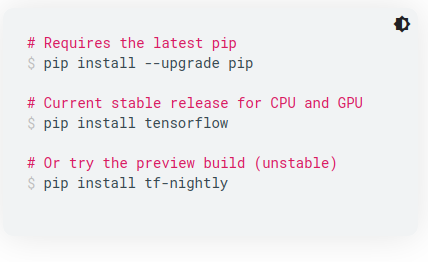




In [48]:
#pip install tensorflow (es para cuando tienes GPU (acelerador grafico en la lap))
#pip install tf-nightly (para cuando no tienes acelerador grafico)
#pip install keras

In [49]:
#verificamos si está instalado el tensorflow
#print ("TensorFlow version: " + tf.__version__)

### LSTM Model

In [50]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [51]:
model = Sequential()
model.add(LSTM(4, input_shape=(Xtrain.shape[1], Xtrain.shape[2])))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam")
model.fit(
    Xtrain, ytrain, epochs=100, validation_data=(Xtest, ytest), batch_size=16, verbose=1
)

Epoch 1/100
15/15 [==============================] - 4s 139ms/step - loss: 0.3070 - val_loss: 0.2741
Epoch 2/100
15/15 [==============================] - 0s 6ms/step - loss: 0.1835 - val_loss: 0.2162
Epoch 3/100
15/15 [==============================] - 0s 5ms/step - loss: 0.1811 - val_loss: 0.1689
Epoch 4/100
15/15 [==============================] - 0s 5ms/step - loss: 0.1808 - val_loss: 0.1337
Epoch 5/100
15/15 [==============================] - 0s 5ms/step - loss: 0.1253 - val_loss: 0.1082
Epoch 6/100
15/15 [==============================] - 0s 5ms/step - loss: 0.1174 - val_loss: 0.0889
Epoch 7/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0958 - val_loss: 0.0741
Epoch 8/100
15/15 [==============================] - 0s 6ms/step - loss: 0.1032 - val_loss: 0.0631
Epoch 9/100
15/15 [==============================] - 0s 6ms/step - loss: 0.0970 - val_loss: 0.0542
Epoch 10/100
15/15 [==============================] - 0s 6ms/step - loss: 0.0879 - val_loss: 0.0478
Epoch 1

Epoch 83/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0026 - val_loss: 0.0033
Epoch 84/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0037 - val_loss: 0.0038
Epoch 85/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0039 - val_loss: 0.0033
Epoch 86/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0030 - val_loss: 0.0035
Epoch 87/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0029 - val_loss: 0.0035
Epoch 88/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0033 - val_loss: 0.0031
Epoch 89/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0029 - val_loss: 0.0032
Epoch 90/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0033 - val_loss: 0.0034
Epoch 91/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0032 - val_loss: 0.0031
Epoch 92/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0028 - val_loss: 0.0032


In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 4)                 112       
_________________________________________________________________
dense (Dense)                (None, 1)                 5         
Total params: 117
Trainable params: 117
Non-trainable params: 0
_________________________________________________________________


In [53]:
trainPredict = model.predict(Xtrain)
testPredict = model.predict(Xtest)

In [54]:
trainPredict = np.c_[trainPredict, np.zeros(trainPredict.shape)]
testPredict = np.c_[testPredict, np.zeros(testPredict.shape)]

In [55]:
#invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainPredict = [x[0] for x in trainPredict]

testPredict = scaler.inverse_transform(testPredict)
testPredict = [x[0] for x in testPredict]

In [56]:
print(trainPredict[:20])
print(testPredict[:20])

[4597.855809563808, 4697.3625343046715, 5032.9689290696015, 5576.881909095757, 4797.415968691372, 5658.148580779993, 5510.963948283456, 5963.40655690264, 7419.461187670976, 5892.644321656339, 8434.162644143105, 8222.33725367412, 8923.285850019009, 11776.356503103525, 14239.951761413218, 13982.914689893127, 15991.127731012553, 15755.468027664425, 14222.771712457688, 13997.242381052973]
[43048.624411476856, 41357.463052354455, 40192.17882414401, 40167.60009507478, 41527.858247506025, 44237.05794115961, 46870.497972176076, 46797.24816163123, 44221.831752653125, 42108.05733990014, 41175.76238439084, 39268.74631973565, 36551.38218118429, 33765.07507887364, 32310.875687332154, 31923.30959941894, 30378.768527352215, 27076.497467334273, 24229.861094835403, 21415.208628917637]


In [57]:
print(trainPredict)


[4597.855809563808, 4697.3625343046715, 5032.9689290696015, 5576.881909095757, 4797.415968691372, 5658.148580779993, 5510.963948283456, 5963.40655690264, 7419.461187670976, 5892.644321656339, 8434.162644143105, 8222.33725367412, 8923.285850019009, 11776.356503103525, 14239.951761413218, 13982.914689893127, 15991.127731012553, 15755.468027664425, 14222.771712457688, 13997.242381052973, 13403.790452795924, 10965.623226315976, 10410.303599706293, 10612.755101018549, 8911.5691847229, 10805.226598744988, 10004.142886436433, 9844.389501284064, 9917.81102878049, 8263.032314798833, 8373.25696191743, 8805.800824547709, 8169.986788436026, 8894.354792377055, 9550.113984464557, 9267.14672505632, 9580.432700715215, 8706.61247231707, 8832.950666891933, 7799.243392579109, 7583.155708912015, 7338.198228785694, 7244.379512040913, 7222.039600740373, 6715.834038931393, 7808.527246361226, 7946.234959530086, 6939.0902091770995, 7559.589645757229, 7785.956213325859, 7399.110408409536, 7520.36299661845, 6652

In [58]:
from sklearn.metrics import mean_squared_error

In [59]:
#calculate root mean squared error
trainScore = mean_squared_error([x[0][0] for x in Xtrain], trainPredict, squared=False)
print("Train Score: %.2f RMSE" % (trainScore))

Train Score: 25059.98 RMSE


In [60]:
testScore = mean_squared_error([x[0][0] for x in Xtest], testPredict, squared=False)
print("Test Score: %.2f RMSE" % (testScore))

Test Score: 28512.83 RMSE


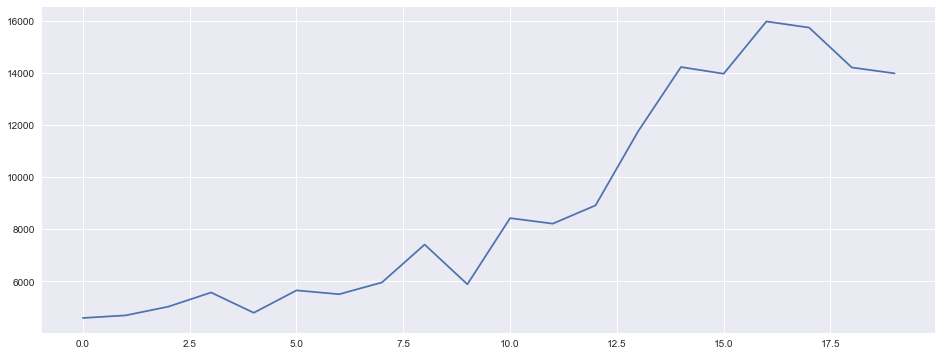

In [61]:
plt.figure(1, figsize=(16,6)) 
_ = plt.plot(trainPredict[:20])

In [62]:
# Apilar los __DataFrames__ uno encima del otro
type(df.Close)

pandas.core.series.Series

In [63]:
type(trainPredict[:20])

list

In [64]:
df_close_list = df.Close.tolist()

In [65]:
tendencia = df_close_list + trainPredict[:20]

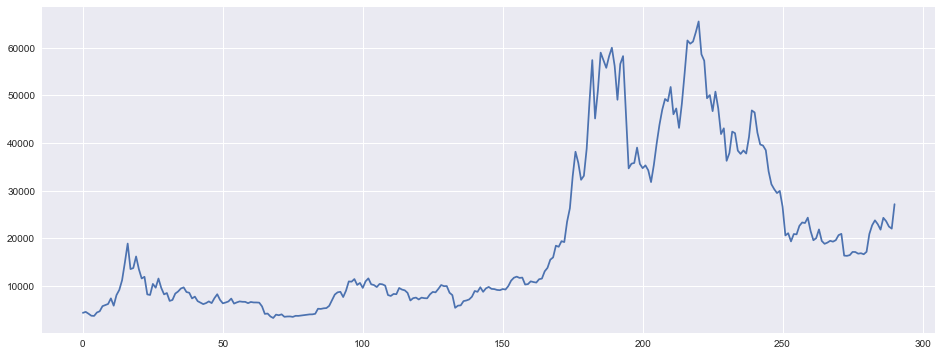

In [66]:
plt.figure(1, figsize=(16,6)) 
_ = plt.plot(df_close_list)

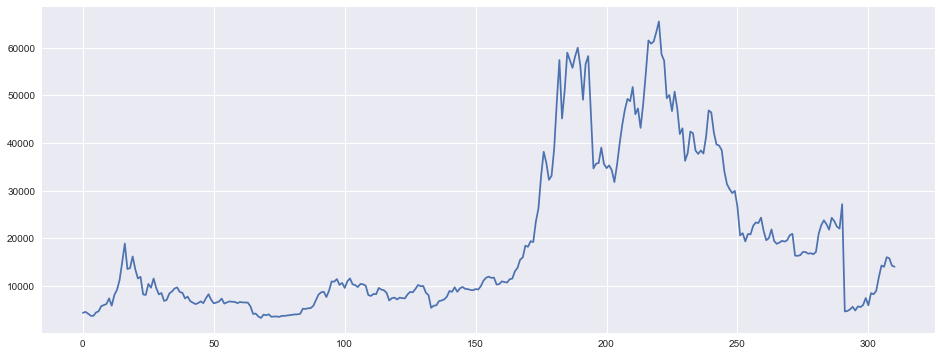

In [67]:
plt.figure(1, figsize=(16,6)) 
_ = plt.plot(tendencia)